# LOAD PACKAGES

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# READ DATA

In [7]:
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#read the data
data = pd.read_csv("iris.data",names = names)
data.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# DATA EXPLORATION

In [8]:
#check null
data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [9]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# DATA PREPROCESSING

In [14]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 4].values

# DATA SPLITTING 

In [15]:
#20% test data and 80% train data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# FEATURE SCALING
Scaling the data that is standardizing the data and prevents outlier effects

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TRAINING THE DATA

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [21]:
#predicction
Y_pred = classifier.predict(X_test)

# ACCURACY

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [23]:
#since all the 30 data is predicted correctly the model gices 100% accuracy.

# HOW TO FIND "K" VALUE WITH LEAST ERROR 

Take k value like around 1 to 40 and iterate through the model, when predicted values is not equal to the actual value, append it to the empty array "error"

In [25]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

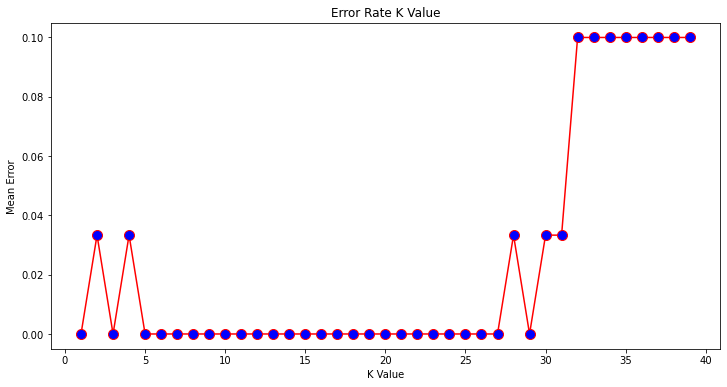

In [27]:
# PLOT THE GRAPH TO VIEW THE K POINTS WITH MIN ERROR
plt.figure(figsize=(12, 6)) #FIG SIZE
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10) #FIG CUSTOMIZE
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')